# Harvesting Hope: Revolutionizing Farming Practices for Sustainable Crop Yield Growth

## Preliminary Work & Exploratory Data Analysis:

In [16]:
# Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score



# Ignore Futurewarnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
df = pd.read_csv("tydone.csv")

## Exploratory Data Analysis:

In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7893 entries, 0 to 7892
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            7893 non-null   object 
 1   Item            7893 non-null   object 
 2   Year            7893 non-null   int64  
 3   Area_harvested  7893 non-null   float64
 4   Yield           7893 non-null   float64
 5   temperature     7893 non-null   float64
 6   precipitation   7893 non-null   float64
 7   humidity        7893 non-null   float64
 8   Soil_PH         7893 non-null   float64
 9   Soil_Nitrogen   7893 non-null   float64
 10  Soil_OM         7893 non-null   float64
 11  VHI             7893 non-null   float64
 12  ASI             7893 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 801.8+ KB


In [4]:
print(f'Total Columns: {len(df.columns)}\nTotal rows: {len(df.index)}') 

Total Columns: 13
Total rows: 7893


In [5]:
df.head(100)

Area        Item  Year  Area_harvested    Yield  temperature  \
0   Thailand  Areca nuts  1961             0.0      0.0        26.23   
1   Thailand  Areca nuts  1962             0.0      0.0        26.08   
2   Thailand  Areca nuts  1963             0.0      0.0        26.07   
3   Thailand  Areca nuts  1964             0.0      0.0        26.14   
4   Thailand  Areca nuts  1965             0.0      0.0        26.28   
..       ...         ...   ...             ...      ...          ...   
95  Thailand   Asparagus  1994          4000.0  65000.0        26.81   
96  Thailand   Asparagus  1995          4500.0  65556.0        26.70   
97  Thailand   Asparagus  1996          5000.0  70000.0        26.32   
98  Thailand   Asparagus  1997          5500.0  70000.0        26.86   
99  Thailand   Asparagus  1998          6000.0  80000.0        27.50   

    precipitation  humidity  Soil_PH  Soil_Nitrogen  Soil_OM   VHI    ASI  
0         1740.10     78.50     4.33           0.92     3.69  0.36  19.17  
1         1586.14     76.30     5.95           4.05     2.66  0.55   3.96  
2         1664.81     77.30     4.72           1.49     3.91  0.40   8.93  
3         1689.46     73.19     4.89           3.02     3.65  0.43   7.68  
4         1600.65     73.50     4.50           2.43     2.92  0.41  18.26  
..            ...       ...      ...            ...      ...   ...    ...  
95        1653.44     72.60     4.76           3.68     1.56  0.52   2.46  
96        1669.60     79.00     5.52           2.18     3.77  0.51   3.14  
97        1754.71     69.80     4.37           1.77     3.72  0.54   1.09  
98        1390.14     67.40     4.85           2.30     2.09  0.50   2.07  
99        1520.52     73.20     4.96           1.73     1.96  0.54   3.08  

[100 rows x 13 columns]

In [6]:
df["Item"].value_counts()

Item
Other pulses n.e.c.                124
Tomatoes                           124
Maize (corn)                       124
Mangoes, guavas and mangosteens    124
Wheat                              124
                                  ... 
Melonseed                           30
Other oil seeds, n.e.c.             30
Nutmeg, mace, cardamoms, raw        30
Coir, raw                           25
Cow peas, dry                        9
Name: count, Length: 95, dtype: int64

**Most EDA was done directly on SQL when feature-engineering.**

The original dataset:
- Area (only 1 country)
- Item
- Year
- Area Harvested
- Yield

My transofrmations included appending 2nd country's data, adding various other columns and ensuring it is accurately sorted based on the previous features,removing NAN's, and converting DTYPES to numerical.

## EDA: Visualizations

In [7]:
# Partition Datset
th = df.iloc[1:62]
ye = df.iloc[-62:]

In [8]:
th

Area        Item  Year  Area_harvested    Yield  temperature  \
1   Thailand  Areca nuts  1962             0.0      0.0        26.08   
2   Thailand  Areca nuts  1963             0.0      0.0        26.07   
3   Thailand  Areca nuts  1964             0.0      0.0        26.14   
4   Thailand  Areca nuts  1965             0.0      0.0        26.28   
5   Thailand  Areca nuts  1966             0.0      0.0        26.75   
..       ...         ...   ...             ...      ...          ...   
57  Thailand  Areca nuts  2018         22788.0  16875.0        26.92   
58  Thailand  Areca nuts  2019         22707.0  16849.0        27.49   
59  Thailand  Areca nuts  2020         22657.0  16862.0        27.42   
60  Thailand  Areca nuts  2021         22717.0  16862.0        26.90   
61  Thailand  Areca nuts  2022         22694.0  16858.0        26.78   

    precipitation  humidity  Soil_PH  Soil_Nitrogen  Soil_OM   VHI    ASI  
1         1586.14     76.30     5.95           4.05     2.66  0.55   3.96  
2         1664.81     77.30     4.72           1.49     3.91  0.40   8.93  
3         1689.46     73.19     4.89           3.02     3.65  0.43   7.68  
4         1600.65     73.50     4.50           2.43     2.92  0.41  18.26  
5         1762.56     76.60     4.62           4.74     3.13  0.57   9.75  
..            ...       ...      ...            ...      ...   ...    ...  
57        1573.64     73.20     5.75           1.75     3.67  0.56   1.38  
58        1308.50     71.90     4.62           0.61     3.24  0.50   7.06  
59        1541.50     72.00     4.25           1.72     1.74  0.55   5.35  
60        1631.11     71.50     5.10           1.57     1.65  0.58   1.39  
61        2066.47     73.00     5.15           0.33     2.34  0.59   1.40  

[61 rows x 13 columns]

In [9]:
ye

Area   Item  Year  Area_harvested    Yield  temperature  precipitation  \
7831  Yemen  Wheat  1961         26000.0  13077.0        24.97         263.95   
7832  Yemen  Wheat  1962         27000.0  12963.0        24.92         181.77   
7833  Yemen  Wheat  1963         28500.0  12982.0        25.07         326.33   
7834  Yemen  Wheat  1964         32000.0  12969.0        24.68         273.92   
7835  Yemen  Wheat  1965         33300.0  13393.0        25.02         193.81   
...     ...    ...   ...             ...      ...          ...            ...   
7888  Yemen  Wheat  2018         64339.0  14332.0        25.50         187.61   
7889  Yemen  Wheat  2019         57466.0  17459.0        25.94         185.96   
7890  Yemen  Wheat  2020         59190.0  21485.0        25.62         188.15   
7891  Yemen  Wheat  2021         60955.0  22644.0        25.64         186.96   
7892  Yemen  Wheat  2022         60000.0  16667.0        25.51         190.54   

      humidity  Soil_PH  Soil_Nitrogen  Soil_OM   VHI    ASI  
7831     47.80     7.00          0.039     0.71  0.48  88.81  
7832     46.61     8.02          0.044     0.74  0.49  83.01  
7833     47.63     6.86          0.019     0.85  0.65  23.02  
7834     44.71     7.50          0.057     1.14  0.68  36.85  
7835     45.83     7.02          0.037     1.10  0.46  20.20  
...        ...      ...            ...      ...   ...    ...  
7888     40.40     6.88          0.021     0.74  0.54   6.74  
7889     41.70     6.93          0.059     0.71  0.65   4.16  
7890     42.40     7.51          0.039     0.74  0.57   3.56  
7891     41.00     7.96          0.029     1.20  0.64   3.85  
7892     43.00     7.97          0.051     1.06  0.68   4.59  

[62 rows x 13 columns]

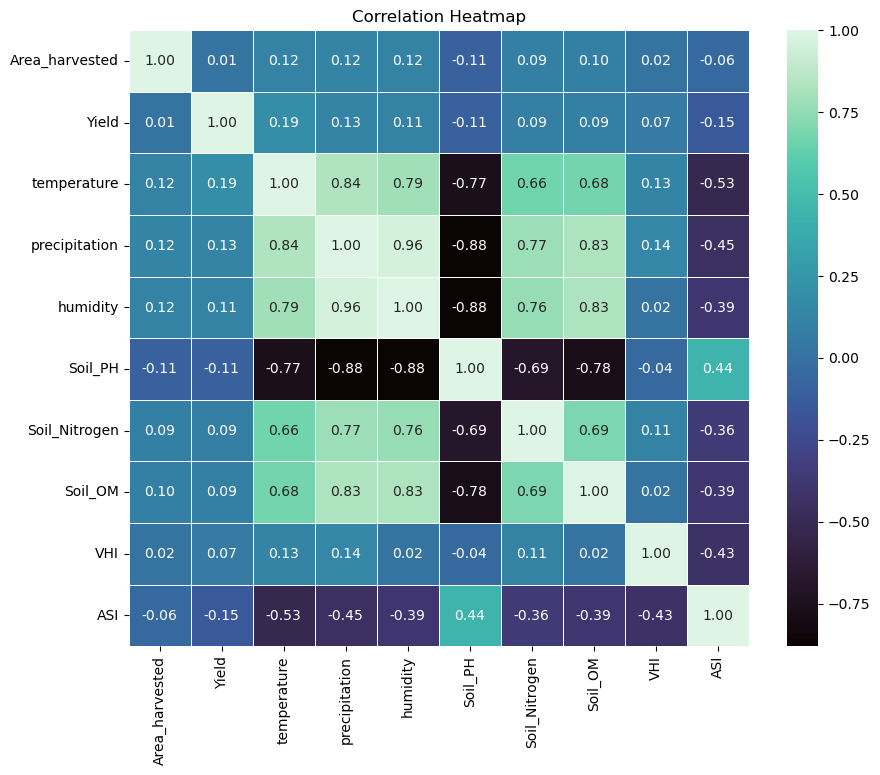

In [21]:
# Drop non-numeric columns
numeric_df = df.drop(columns=['Area', 'Item', 'Year'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap with green and blue color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

# plt.savefig('capstone_heatmap2.png')
plt.show()

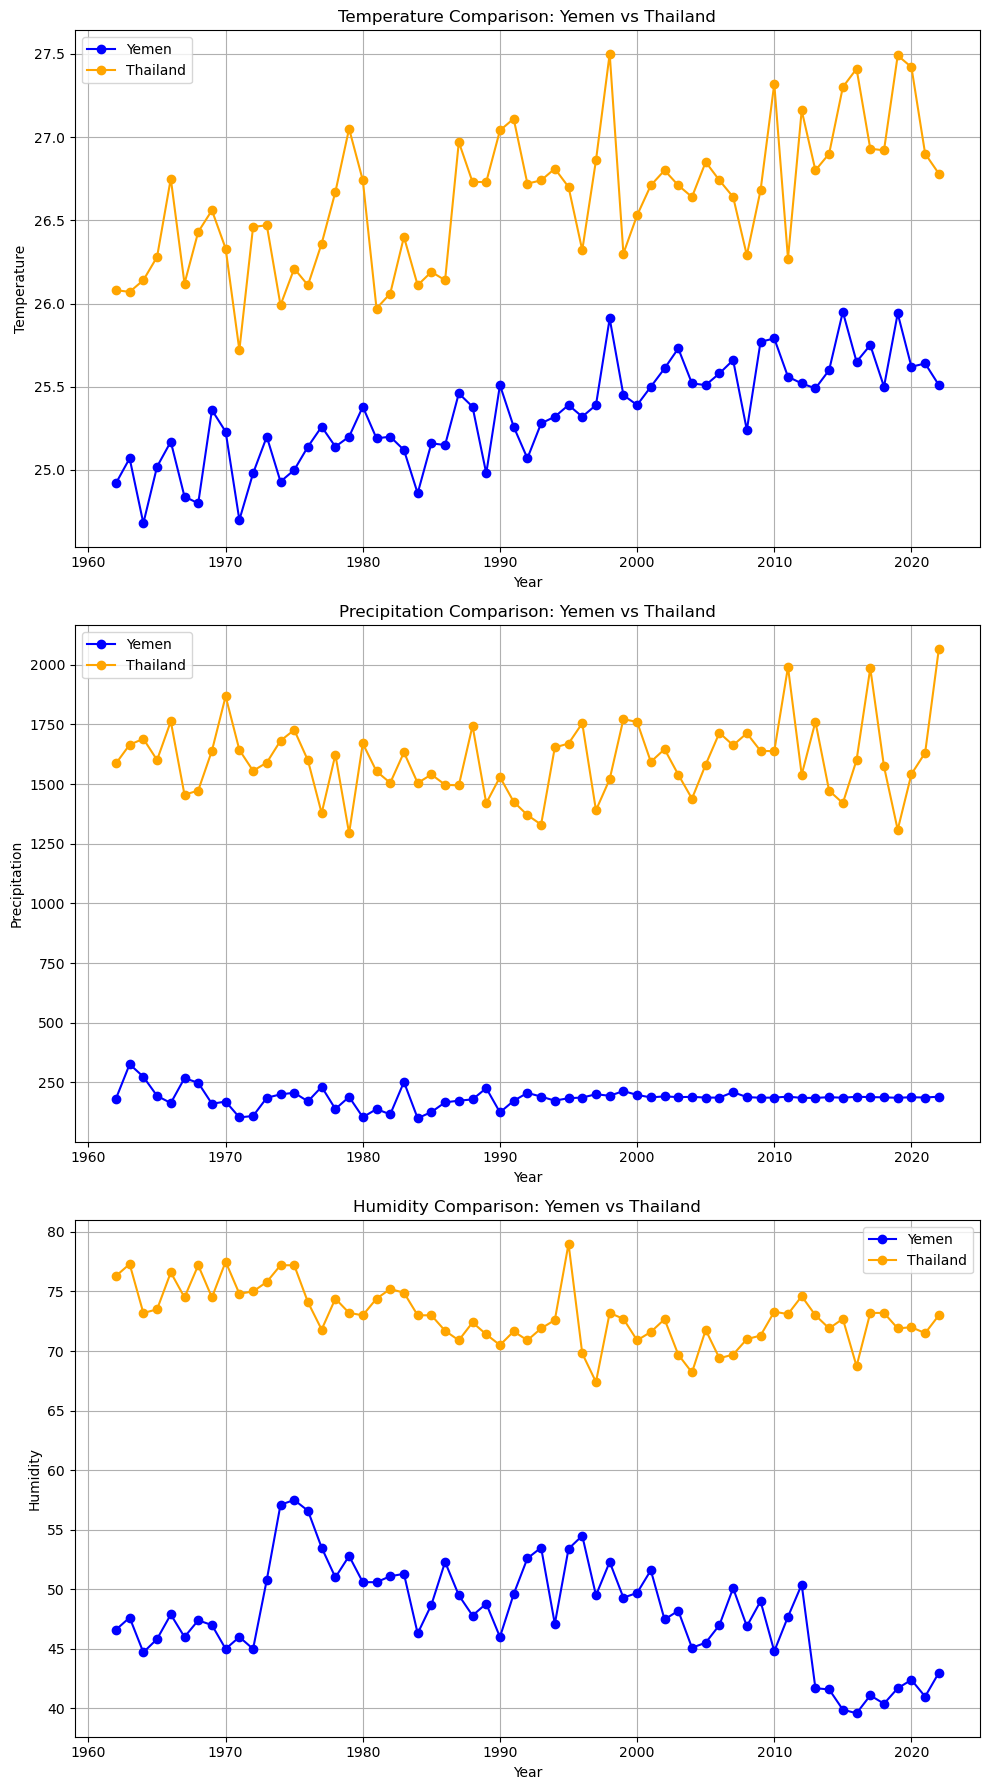

In [10]:
# Merge the dataframes on the 'Year' column
merged_df = pd.merge(ye, th, on='Year', suffixes=('_ye', '_th'))

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot temperature
axes[0].plot(merged_df['Year'], merged_df['temperature_ye'], label='Yemen', marker='o', color='blue')
axes[0].plot(merged_df['Year'], merged_df['temperature_th'], label='Thailand', marker='o', color='orange')
axes[0].set_ylabel('Temperature')
axes[0].set_xlabel('Year')
axes[0].set_title('Temperature Comparison: Yemen vs Thailand')
axes[0].legend()
axes[0].grid(True)

# Plot precipitation
axes[1].plot(merged_df['Year'], merged_df['precipitation_ye'], label='Yemen', marker='o', color='blue')
axes[1].plot(merged_df['Year'], merged_df['precipitation_th'], label='Thailand', marker='o', color='orange')
axes[1].set_ylabel('Precipitation')
axes[1].set_xlabel('Year')
axes[1].set_title('Precipitation Comparison: Yemen vs Thailand')
axes[1].legend()
axes[1].grid(True)

# Plot humidity
axes[2].plot(merged_df['Year'], merged_df['humidity_ye'], label='Yemen', marker='o', color='blue')
axes[2].plot(merged_df['Year'], merged_df['humidity_th'], label='Thailand', marker='o', color='orange')
axes[2].set_ylabel('Humidity')
axes[2].set_title('Humidity Comparison: Yemen vs Thailand')
axes[2].legend()
axes[2].grid(True)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

We already see a huge discrepancy between the two countries based on precipitation!

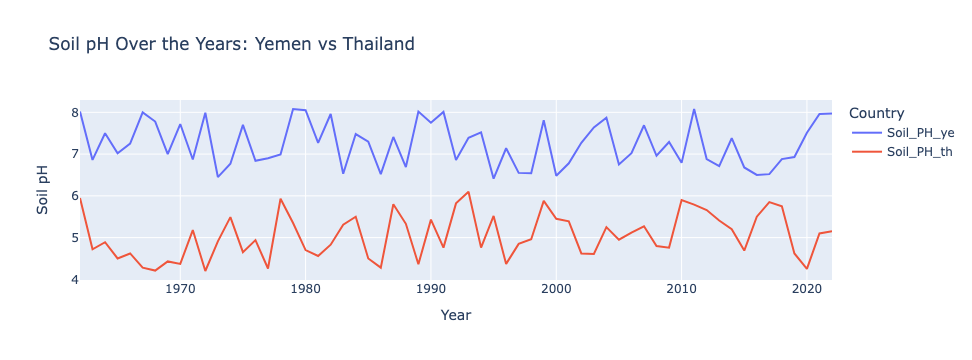

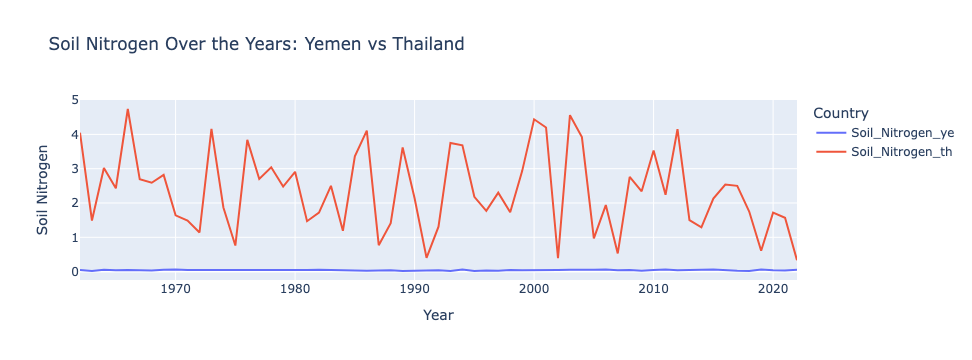

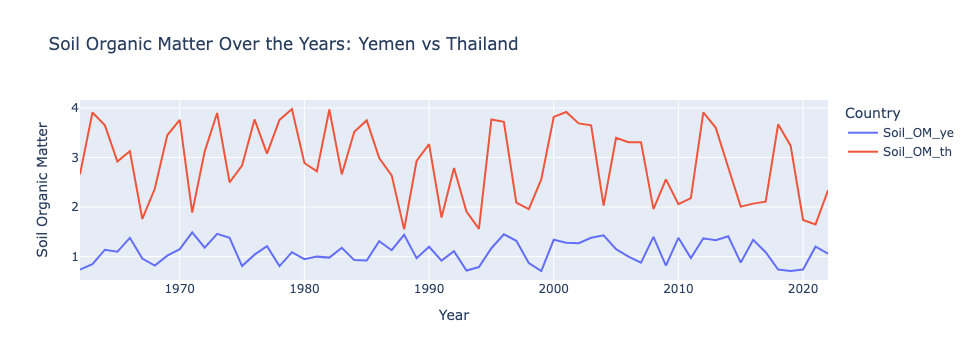

In [11]:
# Melt the dataframe to long format for Plotly
merged_df_melted = pd.melt(merged_df, id_vars=['Year'], value_vars=['Soil_PH_ye', 'Soil_PH_th'], var_name='Country', value_name='Soil_PH')
merged_df_melted2 = pd.melt(merged_df, id_vars=['Year'], value_vars=['Soil_Nitrogen_ye', 'Soil_Nitrogen_th'], var_name='Country', value_name='Soil_Nitrogen')
merged_df_melted3 = pd.melt(merged_df, id_vars=['Year'], value_vars=['Soil_OM_ye', 'Soil_OM_th'], var_name='Country', value_name='Soil_OM')

# Plotting
fig1 = px.line(merged_df_melted, x='Year', y='Soil_PH', color='Country', line_group='Country',
               title='Soil pH Over the Years: Yemen vs Thailand')
fig1.update_layout(yaxis_title='Soil pH', xaxis_title='Year')

fig2 = px.line(merged_df_melted2, x='Year', y='Soil_Nitrogen', color='Country', line_group='Country',
                title='Soil Nitrogen Over the Years: Yemen vs Thailand')
fig2.update_layout(yaxis_title='Soil Nitrogen', xaxis_title='Year')

fig3 = px.line(merged_df_melted3, x='Year', y='Soil_OM', color='Country', line_group='Country',
                title='Soil Organic Matter Over the Years: Yemen vs Thailand')
fig3.update_layout(yaxis_title='Soil Organic Matter', xaxis_title='Year')

fig1.show()
fig2.show()
fig3.show()

Continually, we see discrepancies in soil composition between the two countries.

Key Insights:
- Yemen' soil is more basic
- Thailand has significantly more nitrogen in its soil by comparison, a extremely low nitrogen (Yemen) is indicative of stunted growth.
- Thailand has more organic matter which contributes to soil productivity.

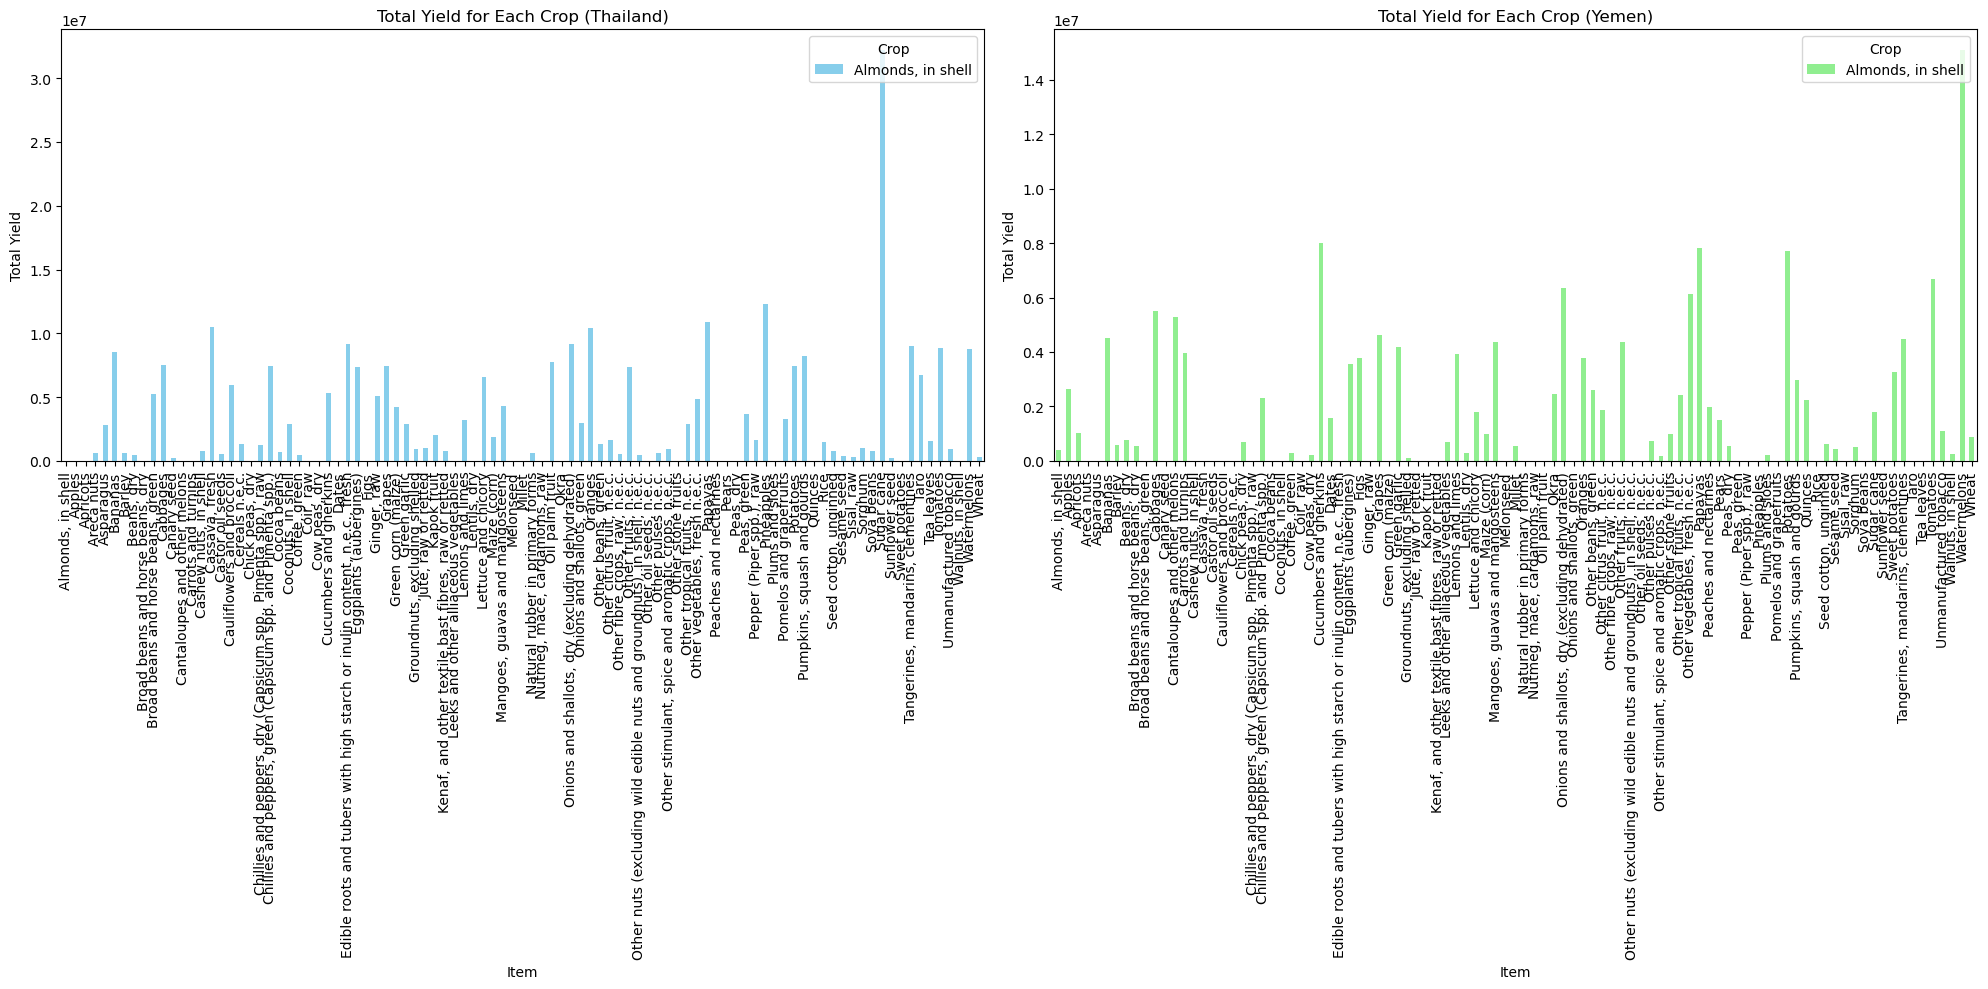

In [12]:
# Calculate total yield for each crop and country
total_yield = df.groupby(['Area', 'Item'])['Yield'].sum().reset_index()

# Pivot the DataFrame to have countries as columns
pivot_df = total_yield.pivot(index='Item', columns='Area', values='Yield')

# Create side-by-side bar plots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot for Thailand
pivot_df['Thailand'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Total Yield for Each Crop (Thailand)')
axs[0].set_ylabel('Total Yield')
axs[0].legend(labels=pivot_df.index, title='Crop', loc='upper right')

# Plot for Yemen
pivot_df['Yemen'].plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Total Yield for Each Crop (Yemen)')
axs[1].set_ylabel('Total Yield')
axs[1].legend(labels=pivot_df.index, title='Crop', loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Modeling:

In [13]:
# RandomForest

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Yield', 'Area', 'Item'])
y = df['Yield'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model selection and training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred),2)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Absolute Error: 38532.61
R-squared Score: 0.32171084122861926


In [14]:
# LinearRegression

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Yield', 'Area', 'Item'])
y = df['Yield'] 

# Split data into training and testing sets
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X, y, test_size=0.25, random_state=42)

# Model training
model2 = LinearRegression()
model2.fit(X_trainl, y_trainl)

# Model evaluation
y_predl = model2.predict(X_testl)
mae2 = round(mean_absolute_error(y_testl, y_predl),2)
r2 = r2_score(y_testl, y_predl)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Absolute Error: 38532.61
R-squared Score: 0.07637156682165969


In [15]:
# Decisiontree Regressor

X = df.drop(columns=['Yield', 'Area', 'Item'])
y = df['Yield']

# Split 
X_traind, X_testd, y_traind, y_testd = train_test_split(X, y, test_size=0.25, random_state=42)

# Train
model3 = DecisionTreeRegressor(random_state=42)
model3.fit(X_traind, y_traind)

# Model evaluation
y_pred3 = model3.predict(X_testd)
mae = round(mean_absolute_error(y_testd, y_pred3),2)
r2 = r2_score(y_testd, y_pred3)
print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)

Mean Absolute Error: 43268.79
R-squared Score: -0.11623358386146276


## Optimization:

In [30]:
# RF
from sklearn.model_selection import GridSearchCV

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Yield', 'Area', 'Item'])
y = df['Yield'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the parameter grid for RandomForestRegressor with reduced parameters
param_grid_rf = {
    'n_estimators': [100],  # Reduced to 1 value
    'max_depth': [None, 10],  # Reduced to 2 values
    'min_samples_split': [2],  # Reduced to 1 value
    'min_samples_leaf': [1],  # Reduced to 1 value
    'max_features': ['auto']  # Reduced to 1 value
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with reduced parameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters found for RandomForestRegressor:")
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


dyld[15876]: Assertion failed: (this->magic == kMagic), function mf, file Loader.cpp, line 123.

exception calling callback for <Future at 0x137404790 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/admin/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "/Users/admin/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "/Users/admin/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/admin/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/admin/anaconda3/lib/python3.11/site-packages/joblib/parallel.py", line 819, in _dispatch
    job = self._ba

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6)}